In [1]:
from google.colab import drive as drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Access a public Github repos
!rm -rf /content/Brain-Tumor-MRI-Dataset # remove git clone
%cd '/content'
!git clone https://github.com/ricardotran92/Brain-Tumor-MRI-Dataset.git

/content
Cloning into 'Brain-Tumor-MRI-Dataset'...
remote: Enumerating objects: 6753, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6753 (delta 0), reused 0 (delta 0), pack-reused 6750
Receiving objects: 100% (6753/6753), 140.81 MiB | 11.16 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (7184/7184), done.


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image


In [4]:
# @title
def DataSetSummary (local_path, tabs):
  # Take list of files & folders in local folder
  all_items = os.listdir(local_path)

  # Filter folder list
  folders = [item for item in all_items if os.path.isdir(os.path.join(local_path, item))]

  # Print summary information if folders > 0:
  if(len(folders) > 0):
    indent = '\t' * tabs
    print("{}Tổng số thư mục: {}".format(indent, len(folders)))
    for folder in folders:
      folder_path = os.path.join(local_path, folder)
      files_in_folder = len(os.listdir(folder_path))
      print("{}-Thư mục: {}, Số tệp: {}".format(indent, folder, files_in_folder))
      DataSetSummary(folder_path, tabs+1)

# DataSetSummary(local_path, 0)

In [5]:
# import os

# Hierarchical local folder in Colab
repository_folder = ["Brain-Tumor-MRI-Dataset"]

for folder in repository_folder:
  local_path = '/content/' + folder + '/dataset'
  # local_path = '/content/' + folder + '/sample'
  DataSetSummary(local_path, 0)

Tổng số thư mục: 2
-Thư mục: Training, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: meningioma, Số tệp: 1339
	-Thư mục: notumor, Số tệp: 1595
	-Thư mục: pituitary, Số tệp: 1457
	-Thư mục: glioma, Số tệp: 1321
-Thư mục: Testing, Số tệp: 4
	Tổng số thư mục: 4
	-Thư mục: meningioma, Số tệp: 306
	-Thư mục: notumor, Số tệp: 405
	-Thư mục: pituitary, Số tệp: 300
	-Thư mục: glioma, Số tệp: 300


In [6]:
%cd /content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Tumor-MRI-Dataset

/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Tumor-MRI-Dataset


In [7]:
# Set the path to your dataset
dataset_path = '/content/Brain-Tumor-MRI-Dataset/sample'
# dataset_path = '/content/Brain-Tumor-MRI-Dataset/dataset'

In [ ]:
import os

class Image:
    def __init__(self, path, label):
        # self.image = cv2.imread(path) # directly read
        self.path = path # only directory
        self.label = label

def load_images_from_folder(dataset_path):
    images = []
    # labels = [] # direct
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                img = Image(image_path, class_name)
                images.append(img)
                # labels.append(img.label) # direct
    # return images, labels # direct
    return images

images = load_images_from_folder(dataset_path)
# for class_name, imgs in images.items():
#     for img in imgs:
#         print(f"Path: {img.path}, Label: {img.label}")

Class meningioma


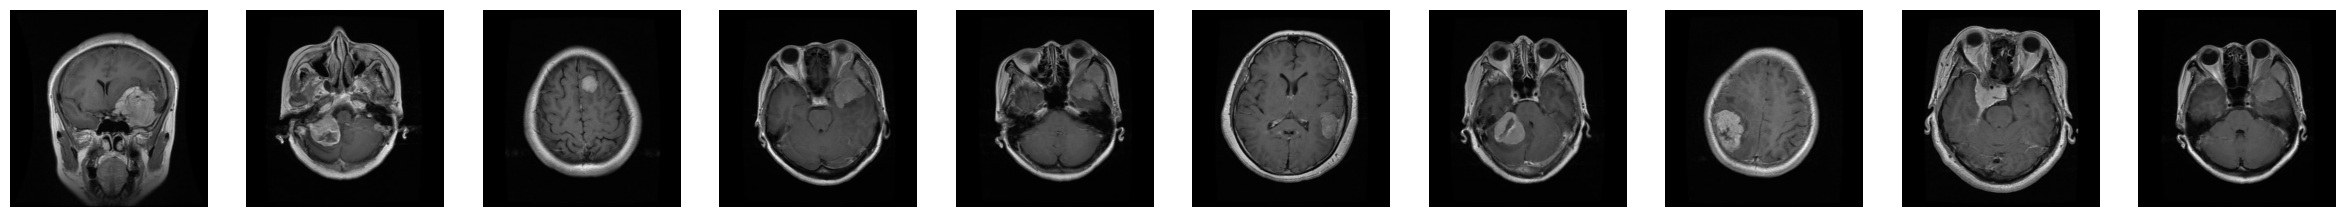

Class glioma


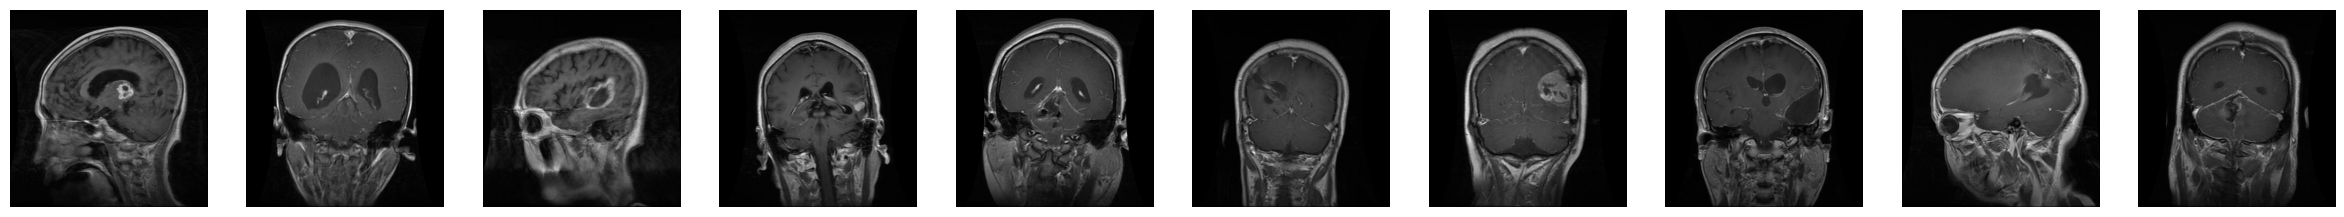

Class notumor


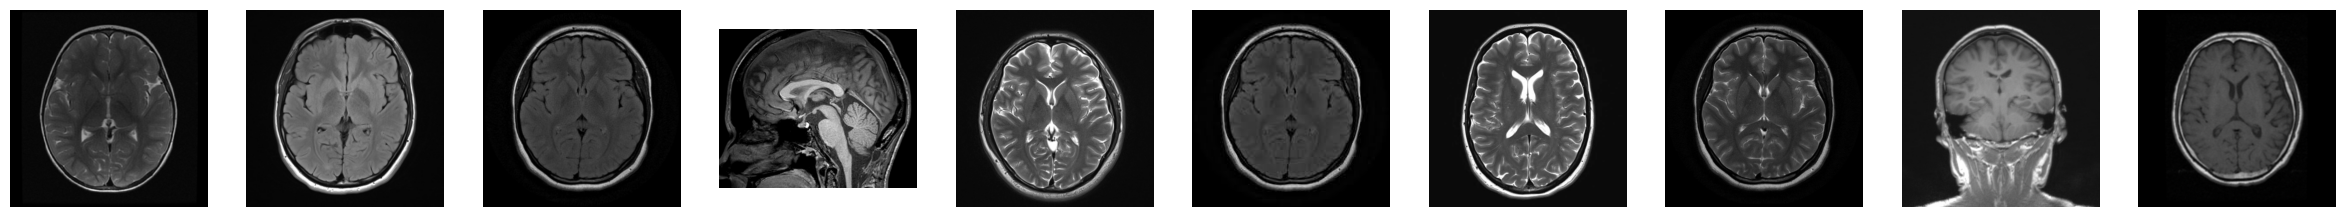

Class pituitary


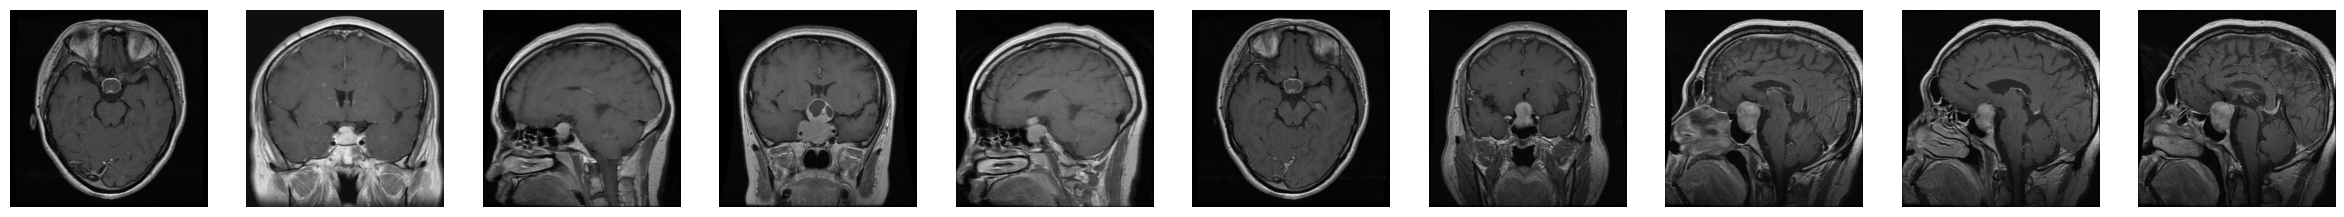

In [ ]:
def load_images_from_folder(dataset_path, images_per_class=None):
    images = {}
    for class_name in os.listdir(dataset_path):
        class_folder_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_folder_path):
            count = 0
            images[class_name] = []
            for image_name in os.listdir(class_folder_path):
                if images_per_class is None or count < images_per_class:
                    image_path = os.path.join(class_folder_path, image_name)
                    img = Image(image_path, class_name)
                    images[class_name].append(img)
                    count += 1
    return images

def imshow(images, images_per_class=None):
    for class_name, imgs in images.items():
        plt.figure(figsize=(30,30))
        print(f'Class {class_name}')
        for i in range(min(images_per_class if images_per_class else len(imgs), len(imgs))):
            plt.subplot(1, images_per_class if images_per_class else len(imgs), i+1)
            img = cv2.imread(imgs[i].path)
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
            # plt.title(os.path.basename(imgs[i].path))
            plt.axis('off')
        plt.show()

# Example usage:
images = load_images_from_folder('/content/Brain-Tumor-MRI-Dataset/sample/Training')
imshow(images, 10)


In [ ]:
from PIL import Image

def get_image_specifications(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Get image specifications
        image_format = img.format
        image_mode = img.mode
        image_size = img.size
        image_width, image_height = img.size
        image_color = img.getcolors()

    return f"Image Format: {image_format}\nImage Mode: {image_mode}\nImage Size: {image_size} pixels (Width: {image_width}, Height: {image_height})\nImage Colors: {image_color}"

# Example usage:
print('images.keys:', images.keys())
image_path = "/content/Brain-Tumor-MRI-Dataset/sample/Training/glioma/Tr-gl_0010.jpg"
# print('image_path:',image_path := images['normal'][0].path)
image_specifications = get_image_specifications(image_path)
print(image_specifications)

images.keys: dict_keys(['meningioma', 'glioma', 'notumor', 'pituitary'])
Image Format: JPEG
Image Mode: RGB
Image Size: (512, 512) pixels (Width: 512, Height: 512)
Image Colors: [(1, (255, 255, 255)), (1, (243, 243, 243)), (1, (237, 237, 237)), (1, (233, 233, 233)), (2, (231, 231, 231)), (1, (229, 229, 229)), (1, (225, 225, 225)), (1, (217, 217, 217)), (2, (215, 215, 215)), (1, (213, 213, 213)), (2, (211, 211, 211)), (6, (209, 209, 209)), (6, (207, 207, 207)), (6, (205, 205, 205)), (7, (203, 203, 203)), (10, (201, 201, 201)), (14, (199, 199, 199)), (15, (197, 197, 197)), (12, (195, 195, 195)), (24, (193, 193, 193)), (21, (191, 191, 191)), (28, (189, 189, 189)), (19, (187, 187, 187)), (15, (185, 185, 185)), (11, (183, 183, 183)), (28, (181, 181, 181)), (30, (179, 179, 179)), (48, (177, 177, 177)), (48, (175, 175, 175)), (46, (173, 173, 173)), (58, (171, 171, 171)), (51, (169, 169, 169)), (73, (167, 167, 167)), (57, (165, 165, 165)), (60, (163, 163, 163)), (77, (161, 161, 161)), (80, (15

## Original

In [ ]:
import os
import cv2
import numpy as np
from shutil import copyfile

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)
            dest_item_path = os.path.join(dest_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                img = cv2.imread(src_item_path)
                if img is not None:
                    img = preprocess_func(img)
                    cv2.imwrite(dest_item_path, img)

# Define your preprocessing function here
def preprocess_func(img):
    # TODO: Add your preprocessing steps here
    return img

# Usage:
dataset_path = '/content/Brain-Tumor-MRI-Dataset/sample'
# dataset_path = '/content/Brain-Tumor-MRI-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Tumor-MRI-Dataset/Original'
preprocess_and_copy(dataset_path, output_path, preprocess_func)

## Hydrid image filtering: median and mean filters
DOI: https://doi.org/10.1109/ICEECCOT.2017.8284595

The proposed technique combines both linear and nonlinear filters, specifically using median and mean filters, to enhance the precision of pixel values in a noisy image. Here's a breakdown of the process:

### a. Median Value Calculation:

The median filter processes the image pixel by pixel using a rectangular sub-image window or mask (e.g., 3x3). For each pixel at coordinates (x, y), the median value is calculated by sorting the pixel values within the window numerically and selecting the middle value for odd-sized windows. For even-sized windows, the median may have multiple possible values. The median value (Median) is calculated as follows:

$ \text{Median} = \text{median}\left\{(u,v) \in S_{xy}\right\} \{g(u,v)\} $

Where:
- $ S_{xy} $ is the set of coordinates in the rectangular sub-image window centered at (x, y).
- $ \text{median} $ represents the median value of the window.
- $ g(u,v) $ is the pixel value at coordinates (u, v) in the window.

### b. Average Value Calculation:

The average value is calculated using each pixel in the sub-image window ($ S_{xy} $) and the previously calculated median value. This process maximizes the utilization of neighboring pixels. The average value ($ \text{Averagevalue}_i $) for each pixel is calculated as follows:

$ \text{Averagevalue}_i = \text{average}\left\{(u,v) \in S_{xy}\right\} \{g_i(u,v), \text{Median}\} $

Where:
- $ g_i(u,v) $ is each pixel in the sub-image window.
- If the sub-window size is, for example, 3x4, there will be a total of 12 average values.

### c. Center Pixel Value Calculation:

The center pixel value is calculated by applying arithmetic mean filtering or averaging all the average values ($ \text{Averagevalue}_i $) of the sub-image window. This value is used to replace the original pixel value at coordinates (x, y). The calculation is given by:

$ \text{Center Pixel Value} = \frac{\sum_{i=1}^{N} \text{Averagevalue}_i}{N} $

Where:
- $ N $ is the product of the row (M) and column (N) dimensions of the rectangular sub-image window of size M x N centered at point (x, y).

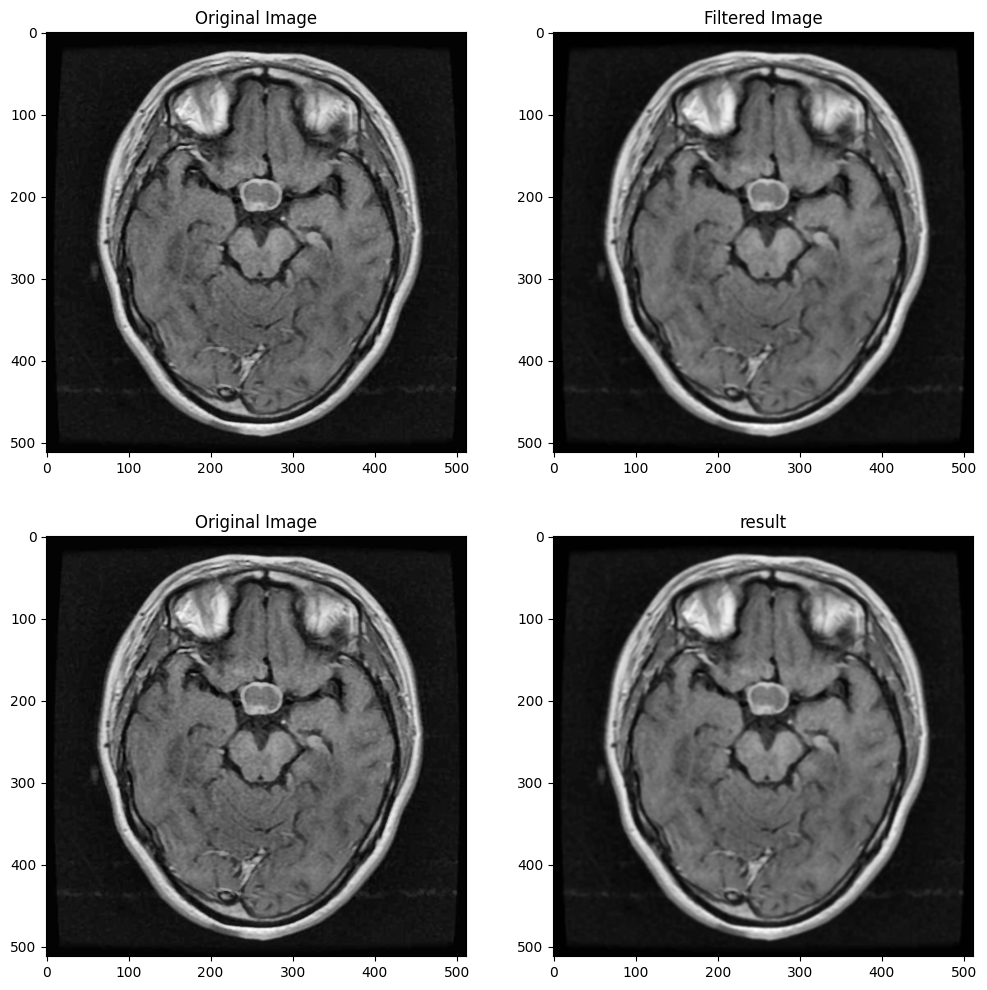

In [ ]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Load the image
# img_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Tumor-MRI-Dataset/CLAHE_medianF3x3_sample/Training/glioma/Tr-gl_0010.jpg'
# img_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Tumor-MRI-Dataset/CLAHE_medianF3x3_sample/Training/meningioma/Tr-me_0010.jpg'
# img_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Tumor-MRI-Dataset/CLAHE_medianF3x3_sample/Training/notumor/Tr-no_0010.jpg'
img_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Tumor-MRI-Dataset/CLAHE_medianF3x3_sample/Training/pituitary/Tr-pi_0023.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

## Source: Github Copilot
def preprocess_func(img):
    # Convert the image to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = img

    # Define the window size
    window_size = 3

    # Apply the median filter
    median_filtered_image = cv2.medianBlur(gray, window_size)

    # Define the padding for the convolution operation
    pad = window_size // 2

    # Pad the median filtered image
    padded_image = cv2.copyMakeBorder(median_filtered_image, pad, pad, pad, pad, cv2.BORDER_REFLECT)

    # Create an empty array to store the final image
    final_image = np.zeros_like(gray)

    # Apply the mean filter
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            # Calculate the average value in the window around the pixel
            average_value = np.mean(padded_image[i:i+window_size, j:j+window_size])

            # Replace the original pixel value with the average value
            final_image[i, j] = int(average_value)

    return final_image

# Apply filter
filtered_img = preprocess_func(img)

## Source: ChatGPT
def median_and_mean_center_filter(image, window_size):
    # Apply median filtering
    median_filtered = median_filter(image, size=window_size)

    # Initialize result with zeros
    result = np.zeros_like(image, dtype=float)

    # Iterate over each pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the sub-window centered at (i, j)
            sub_window = median_filtered[max(0, i - window_size[0]//2):i + window_size[0]//2 + 1,
                                         max(0, j - window_size[1]//2):j + window_size[1]//2 + 1]

            # Calculate the average value for the sub-window
            average_value = np.mean(sub_window)

            # Update the result using the center pixel value
            result[i, j] = average_value

    return result

# Assuming image is a 2D NumPy array
window_size = (3, 3)  # Adjust the window size as needed

# Apply the filtering method
result = median_and_mean_center_filter(img, window_size)

# Display the original and processed images side by side
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image')

plt.subplot(2,2,3)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2,2,4)
plt.imshow(result, cmap='gray')
plt.title('result')

plt.show()

GitHub Copilot: The evaluation metrics indicate that both the Github Copilot's code and ChatGPT's code have successfully reduced the noise in the image, as evidenced by the non-infinite PSNR and non-zero RMSE values.

The PSNR (Peak Signal-to-Noise Ratio) is a measure of the peak error. The fact that PSNR is infinite for the original image indicates there's no noise (as it's being compared with itself), while for the processed images, the PSNR values are finite and quite high, indicating a low level of distortion.

The RMSE (Root Mean Square Error) is a quadratic scoring rule that measures the average magnitude of the error. The fact that RMSE is zero for the original image indicates there's no error (as it's being compared with itself), while for the processed images, the RMSE values are non-zero but quite low, indicating a low level of error.

The SNR (Signal-to-Noise Ratio) is a measure of signal strength relative to background noise. The negative SNR values indicate that the noise is stronger than the signal, which is not ideal. However, the SNR values have increased (become less negative) from the original to the processed images, indicating that the signal has become stronger relative to the noise.

In terms of comparison between Github Copilot's code and ChatGPT's code, the metrics are quite similar, but ChatGPT's code has slightly better PSNR and RMSE values, indicating slightly less distortion and error. However, the differences are quite small and may not be noticeable in the image quality.

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def calculate_metrics(original, processed):
    # Calculate the PSNR
    psnr = peak_signal_noise_ratio(original, processed)

    # Calculate the RMSE
    rmse = np.sqrt(mean_squared_error(original, processed))

    # Calculate the SNR
    mean = np.mean(processed)
    std = np.std(processed)
    snr = 20 * np.log10(mean / (std + 1e-10)) # 1e-10: avoid error std=0

    return psnr, rmse, snr

# Calculate the metrics for the orginal image
psnr, rmse, snr = calculate_metrics(img, img)
print('Original Image')
print(f"PSNR: {psnr}")
print(f"RMSE: {rmse}")
print(f"SNR: {snr}")

# Calculate the metrics for the filtered image
psnr, rmse, snr = calculate_metrics(img, filtered_img)
print('\nGithub Copilot\'s code')
print(f"PSNR: {psnr}")
print(f"RMSE: {rmse}")
print(f"SNR: {snr}")

# Calculate the metrics for the result image
psnr, rmse, snr = calculate_metrics(img, result)
print('\nChatGPT\'s code')
print(f"PSNR: {psnr}")
print(f"RMSE: {rmse}")
print(f"SNR: {snr}")

Original Image
PSNR: inf
RMSE: 0.0
SNR: 1.4375995600358098

Github Copilot's code
PSNR: 36.189202212406244
RMSE: 3.9543951956684085
SNR: 1.5444989676438405

ChatGPT's code
PSNR: 36.26305684579955
RMSE: 3.9209141932712357
SNR: 1.5893429343854615


/usr/local/lib/python3.10/dist-packages/skimage/metrics/simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)
<ipython-input-43-e35b75c3e905>:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, processed)


GitHub Copilot: The difference in performance between the two methods can be attributed to how they handle the mean filtering step.

In the Github Copilot's code, the mean filter is applied to the entire window around each pixel in the median-filtered image. This means that all pixels in the window contribute equally to the final pixel value, which can lead to a blurring effect, especially in areas of the image with high-frequency details (i.e., sharp edges).

On the other hand, in the ChatGPT's code, the mean filter is applied to the sub-window of the median-filtered image. This sub-window is centered at each pixel and its size is smaller than the full window. This approach gives more weight to the pixels closer to the center of the window, which can help preserve high-frequency details and result in a sharper image.

In addition, the ChatGPT's code uses a floating-point data type for the result image, which can provide a higher dynamic range and more precise pixel values compared to the integer data type used in the Github Copilot's code. This can also contribute to the better performance of the ChatGPT's code.

For the next steps, you might want to:
- Experiment with different window and sub-window sizes to see how they affect the results.
- Try other types of filters or combinations of filters to see if they can further improve the image quality.
- Evaluate the performance of the methods on a larger dataset to see if the observed differences hold in general.

In [9]:
import os
import cv2
import numpy as np
from shutil import copyfile
from scipy.ndimage import median_filter

def preprocess_and_copy(src_dir, dest_dir, preprocess_func):
    # Check if src_dir is a directory
    if os.path.isdir(src_dir):
        # If dest_dir does not exist, create it
        os.makedirs(dest_dir, exist_ok=True)

        # Iterate over files/directories in src_dir
        for item in os.listdir(src_dir):
            src_item_path = os.path.join(src_dir, item)
            dest_item_path = os.path.join(dest_dir, item)

            # If item is a directory, call function recursively
            if os.path.isdir(src_item_path):
                preprocess_and_copy(src_item_path, dest_item_path, preprocess_func)
            # If item is a file, apply preprocessing and copy
            elif os.path.isfile(src_item_path):
                img = cv2.imread(src_item_path)
                if img is not None:
                    img = preprocess_func(img)

                    # Export the preprocessed image to the output folder
                    filename_with_ext = os.path.basename(src_item_path)
                    filename, extension = os.path.splitext(filename_with_ext)
                    dest_item_path = os.path.join(dest_dir, filename + '.jpg')
                    # print(dest_item_path)
                    cv2.imwrite(dest_item_path, img)

def median_and_mean_center_filter(image, window_size):
    # Apply median filtering
    median_filtered = median_filter(image, size=window_size)

    # Initialize result with zeros
    result = np.zeros_like(image, dtype=float)

    # Iterate over each pixel
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the sub-window centered at (i, j)
            sub_window = median_filtered[max(0, i - window_size[0]//2):i + window_size[0]//2 + 1,
                                         max(0, j - window_size[1]//2):j + window_size[1]//2 + 1]

            # Calculate the average value for the sub-window
            average_value = np.mean(sub_window)

            # Update the result using the center pixel value
            result[i, j] = average_value

    return result

# Define your preprocessing function here
def preprocess_func(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Assuming image is a 2D NumPy array
    window_size = (3, 3)  # Adjust the window size as needed

    # Apply the filtering method
    filtered_image = median_and_mean_center_filter(gray, window_size)

    return filtered_image

# Usage:
# dataset_path = '/content/Brain-Tumor-MRI-Dataset/sample'
# output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Tumor-MRI-Dataset/Median-Mean-Hybrid-Filter_sample'
dataset_path = '/content/Brain-Tumor-MRI-Dataset/dataset'
output_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/Preprocessing/Brain-Tumor-MRI-Dataset/Median-Mean-Hybrid-Filter'
preprocess_and_copy(dataset_path, output_path, preprocess_func)
